## Pyber Analysis and Plot


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
    

In [2]:
c_df = pd.read_csv("Resources/city_data.csv")
c_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
r_df = pd.read_csv("Resources/ride_data.csv")
r_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


#### Define values
-  Average Fare ($) Per City
-  Total Number of Rides Per City
-  Total Number of Drivers Per City
-  City Type (Urban, Suburban, Rural)

In [4]:
g_df = pd.DataFrame(r_df.groupby(by="city")["fare"].mean())
g_df.rename(columns={'fare': 'average_fare'},inplace=True)
g_df["Total Fare"] = r_df.groupby(by = 'city')["fare"].sum()
g_df["Total Rides"] = r_df.groupby(by= "city")["ride_id"].nunique()
g_df.reset_index(level = 0, inplace = True)


g_df.head()

,city,average_fare,Total Fare,Total Rides
0,Alvarezhaven,23.928710,741.79,31
1,Alyssaberg,20.609615,535.85,26
2,Anitamouth,37.315556,335.84,9
3,Antoniomouth,23.625000,519.75,22
4,Aprilchester,21.981579,417.65,19


In [5]:
# Put what I want to plot in a df.
plot_df = c_df.merge(g_df, how='inner', on='city')
plot_df.rename(columns={'type': 'City Type'},inplace=True)
plot_df.rename(columns={'city': 'City'},inplace=True)
plot_df.rename(columns={'driver_count': 'Total Drivers'},inplace=True)
plot_df.rename(columns={'average_fare': 'Average Fare'},inplace=True)

plot_df.head()

,City,Total Drivers,City Type,Average Fare,Total Fare,Total Rides
0,Kelseyland,63,Urban,21.806429,610.58,28
1,Nguyenbury,8,Urban,25.899615,673.39,26
2,East Douglas,12,Urban,26.169091,575.72,22
3,West Dawnfurt,34,Urban,22.330345,647.58,29
4,Rodriguezburgh,52,Urban,21.332609,490.65,23


#### Build a Bubble Plot that showcases the relationship between the metrics collected.

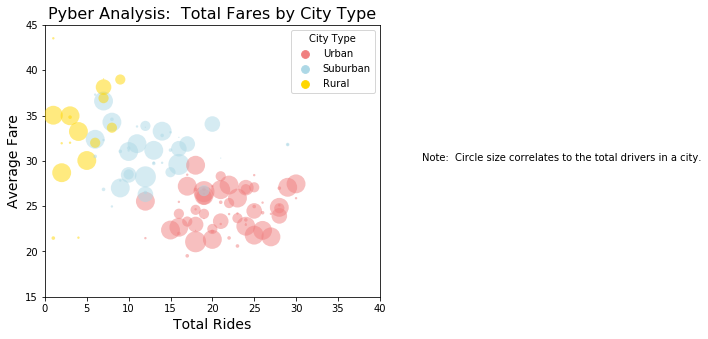

In [18]:
x_axis=np.arange(0,41,5)
y_axis=np.arange(15,50,5)
colors = ["lightcoral", "lightblue", "gold"]
sns.palplot(sns.color_palette(colors))

ax = sns.stripplot(x=plot_df["Total Rides"], y = plot_df["Average Fare"],hue=plot_df['City Type'],
                   edgecolor="black" ,palette=colors, s = plot_df["Total Drivers"]*.3, alpha = .50 )
                   
ax.set_title("Pyber Analysis:  Total Fares by City Type", fontsize=16)
ax.set_xlabel("Total Rides",fontsize=14)
ax.set_ylabel('Average Fare',fontsize=14)


ax.set_xlim(0,40)
ax.set_ylim(15,45)
ax.set_xticks(x_axis)
ax.set_xticklabels(x_axis)
ax.set_yticks(y_axis)
ax.set_yticklabels(y_axis)
ax.figure.set_size_inches(6,5)
plt.text(45, 30, r'Note:  Circle size correlates to the total drivers in a city.')

plt.show()



#### Observable Trend 1

Urban rides were clustered in the lower right area of the quadrant which means that while there were more rides they generally had smaller fares.  This is likely due to urban Pyber users likely are taking short trips.  On the other end of the spectrum are rural Pyber users that took much fewer rides but averaged higher fares.  There are fewer rides for rural drivers because most rural people have their own vehicles (personal observation) and if they do take a Pyber, they likely are taking longer trips (into town or on the way back from town).

#### Produce Pie Charts showing the following:
-  % of Total Fares by City Type
-  % of Total Rides by City Type
-  % of Total Drivers by City Type

City Type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: Total Fare, dtype: float64


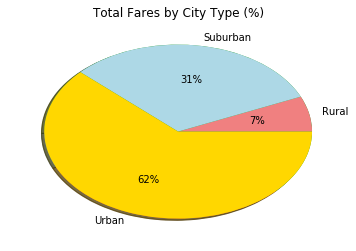

In [22]:
# % of Total Fares by City Type
total_fares = plot_df.groupby(by="City Type")["Total Fare"].sum()
print(total_fares)
labels = ['Rural','Suburban','Urban']

plt.pie(total_fares, shadow=True, startangle=180)
plt.pie(total_fares, colors=colors,autopct='%1.0f%%', labels=labels,shadow=True)
plt.title("Total Fares by City Type (%)")
plt.show()


#### Observable Trend 2
As expected fares follow population.  While urban Pyber users _averaged_ a smaller fare, they took many more rides.  Both the population as well as the number of drivers contribute of this.

City Type
Rural        125
Suburban     657
Urban       1625
Name: Total Rides, dtype: int64


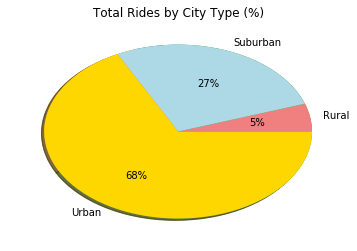

In [27]:
# % of Total Rides by City Type
total_rides = plot_df.groupby(by="City Type")["Total Rides"].sum()
print(total_rides)

plt.pie(total_rides, shadow=True, startangle=90)
plt.pie(total_rides, colors=colors,autopct='%1.0f%%', labels=labels,shadow=True)
plt.title("Total Rides by City Type (%)")
plt.show()

#### Observable Trend 3
Urban riders took 39% more rides than suburban riders.  This is due to population, availability of drivers, and the fact that people living outside of the urban areas typically have their own vehicles.  

City Type
Rural        104
Suburban     638
Urban       2607
Name: Total Drivers, dtype: int64


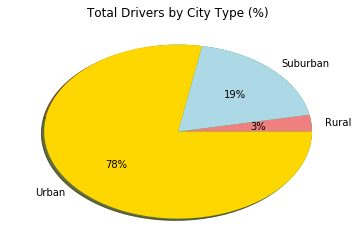

In [29]:
# % of Total Drivers by City Type
total_drivers = plot_df.groupby(by="City Type")["Total Drivers"].sum()
print(total_drivers)

plt.pie(total_drivers, shadow=True, startangle=90)
plt.pie(total_drivers, colors=colors,autopct='%1.0f%%', labels=labels,shadow=True)
plt.title("Total Drivers by City Type (%)")
plt.show()